In [1]:
import shap
shap.initjs()

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import joblib
import shap
import math
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate
from imblearn.over_sampling import SMOTE
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

import warnings
warnings.simplefilter(action='ignore')

# Data Overview

In [5]:
# Step 1: Data Loading and Understandin

df = pd.read_excel('E Comm.xlsx')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Its Accessories,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Its Accessories,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Its Accessories,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Its Accessories,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Its Accessories,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [6]:
df.shape

(5630, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [8]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              2
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              5
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [9]:
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

PreferredLoginDevice : ['Phone' 'Computer']
PreferredLoginDevice
Phone       3996
Computer    1634
Name: count, dtype: int64
________________________________________________________________________________
PreferredPaymentMode : ['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']
PreferredPaymentMode
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: count, dtype: int64
________________________________________________________________________________
Gender : ['Female' 'Male']
Gender
Male      3384
Female    2246
Name: count, dtype: int64
________________________________________________________________________________
PreferedOrderCat : ['Laptop & Its Accessories' 'Mobile' 'Phone' 'Others' 'Fashion' 'Grocery']
PreferedOrderCat
Laptop & Its Accessories    2050
Phone                       1271
Fashion                      826
Mobile                       809
Grocery                      410
Others                       264
Name: count

In [10]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [11]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

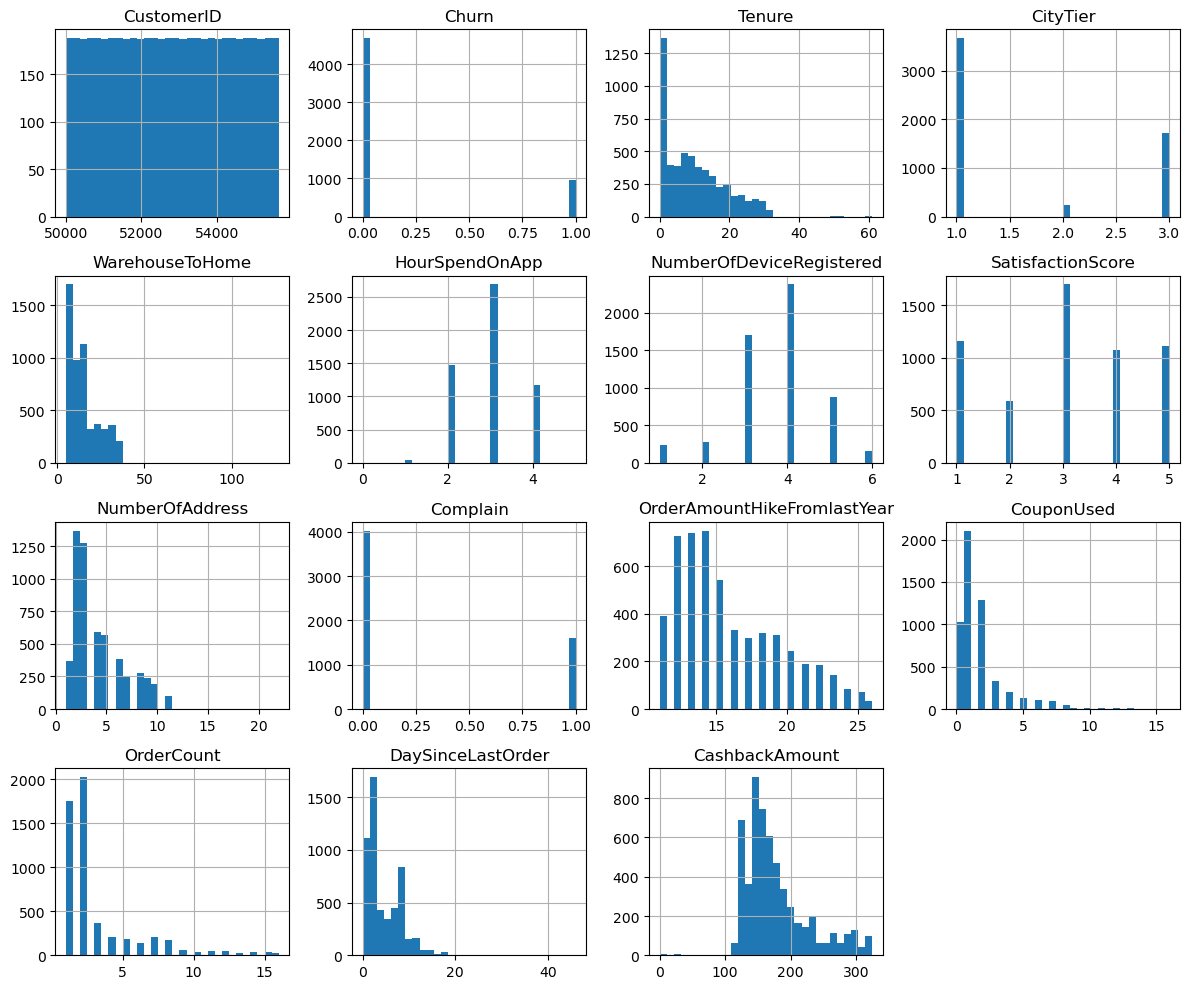

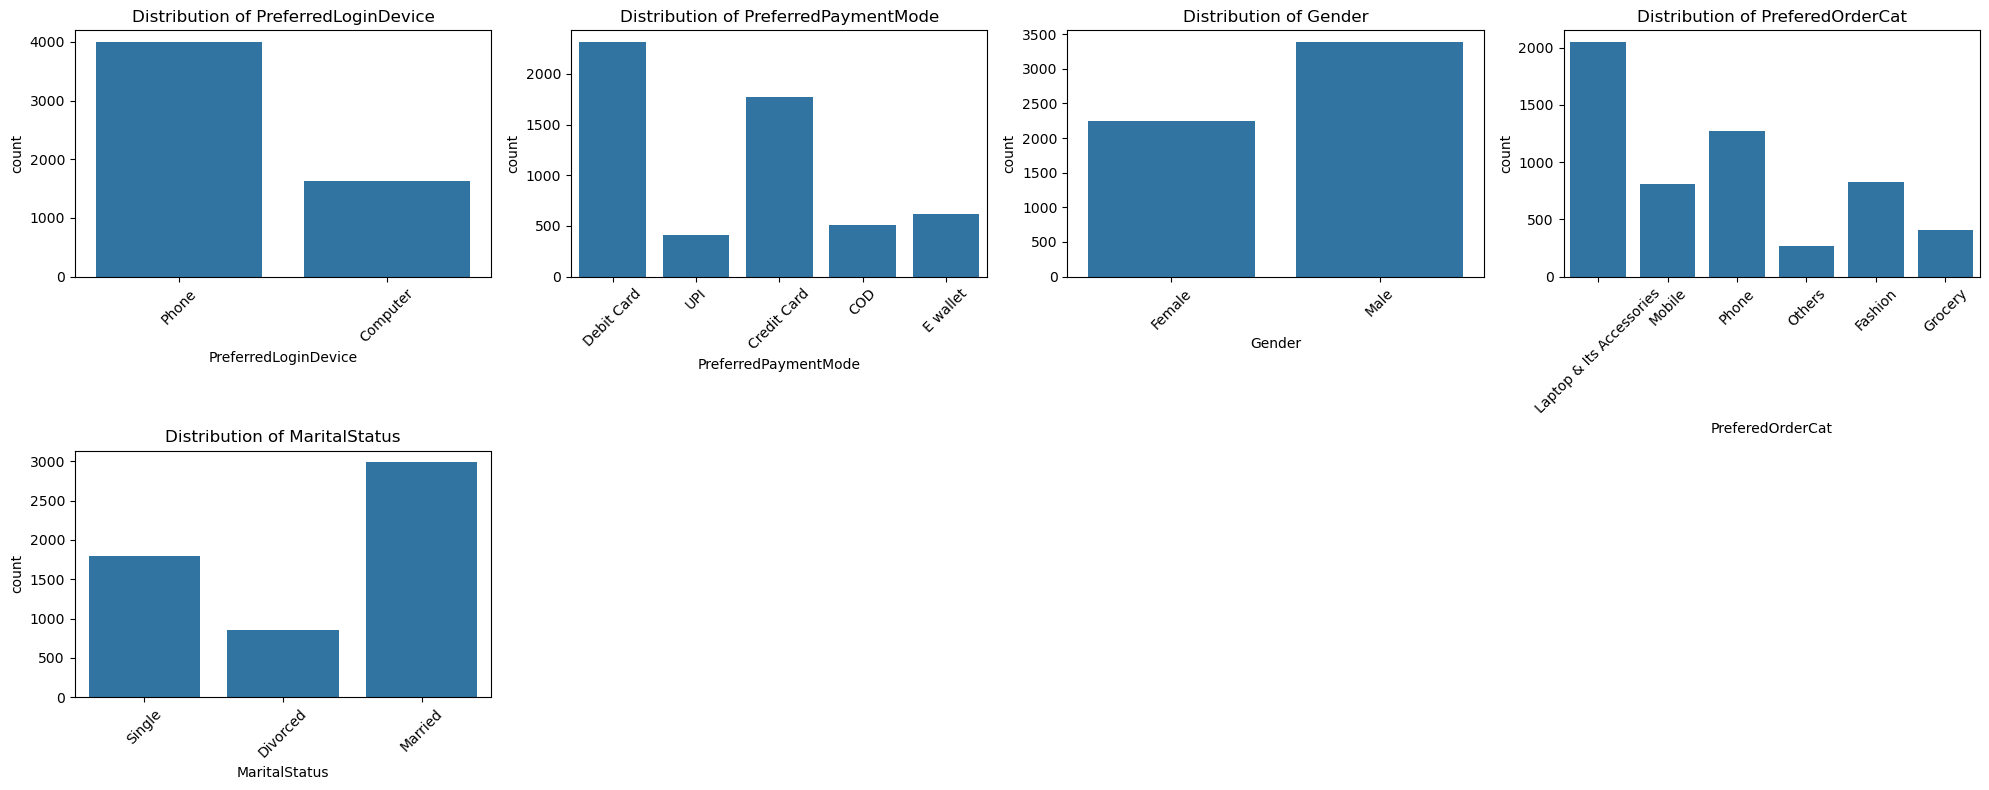

In [12]:
# Plot distribution for numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns
df[num_features].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# Plot distribution for categorical features
cat_features = df.select_dtypes(include=['object']).columns

plots_per_row = 4
total_plots = len(cat_features)
rows = math.ceil(total_plots / plots_per_row)

fig, axes = plt.subplots(rows, plots_per_row, figsize=(plots_per_row*5, rows*4))
axes = axes.flatten()  # flatten in case of single row

for i, col in enumerate(cat_features):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Dat Preprocessing

# Check Duplicate

In [15]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


# Drop Irrelevent column

In [17]:
irrelevant_cols = ['CustomerID']

df.drop(columns=irrelevant_cols, inplace=True)

# Find Missing Values

In [19]:
missing = df.isnull().sum()
print(missing)

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


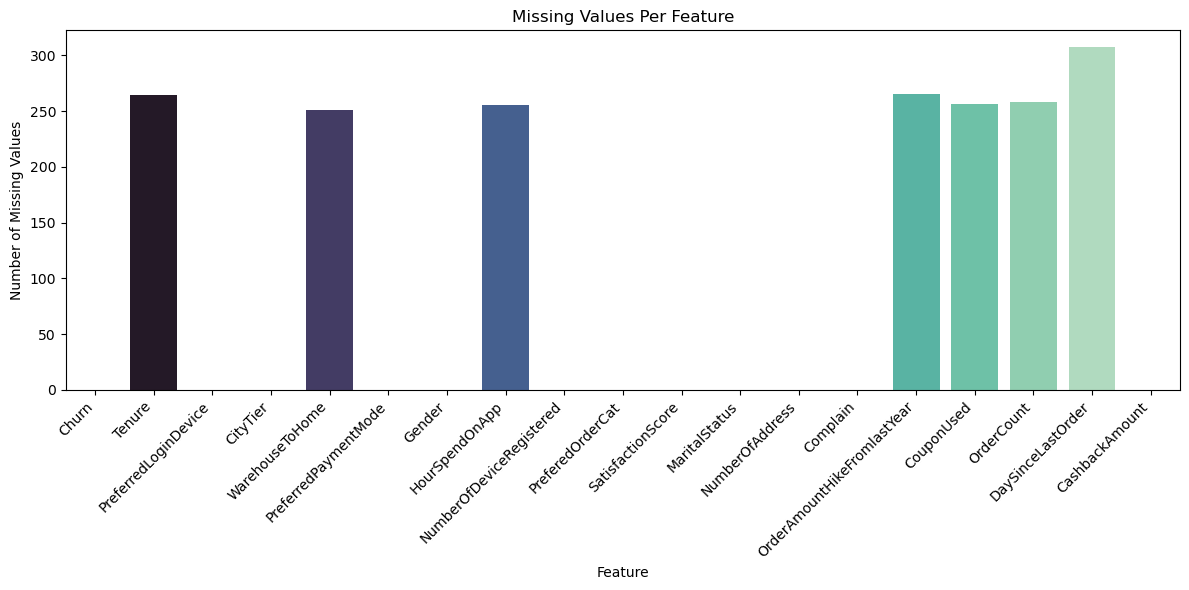

In [20]:
plt.figure(figsize=(12, 6))  # Increase figure size
sns.barplot(x=missing.index, y=missing.values, palette="mako")

plt.title("Missing Values Per Feature")
plt.ylabel("Number of Missing Values")
plt.xlabel("Feature")

plt.xticks(rotation=45, ha='right')  

plt.tight_layout() 
plt.show()

# Handelling missing values

In [22]:
# Fill missing values in numerical columns with mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)


In [23]:
# Fill missing values in categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


In [24]:
missing = df.isnull().sum()
print(missing)

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


# Detect Outlier

In [26]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Filter out binary features (only 2 unique values)
non_binary_cols = [col for col in numeric_cols if df[col].nunique() > 2]

# Dictionary to store outliers
outliers_iqr = {}

for col in non_binary_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_iqr[col] = outliers.index.tolist()

# Print number of outliers in each feature
for col, outlier_indices in outliers_iqr.items():
    print(f"{col}: {len(outlier_indices)} outliers")


Tenure: 4 outliers
CityTier: 0 outliers
WarehouseToHome: 2 outliers
HourSpendOnApp: 6 outliers
NumberOfDeviceRegistered: 397 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 4 outliers
OrderAmountHikeFromlastYear: 33 outliers
CouponUsed: 629 outliers
OrderCount: 703 outliers
DaySinceLastOrder: 62 outliers
CashbackAmount: 438 outliers


# Visualize Outlier

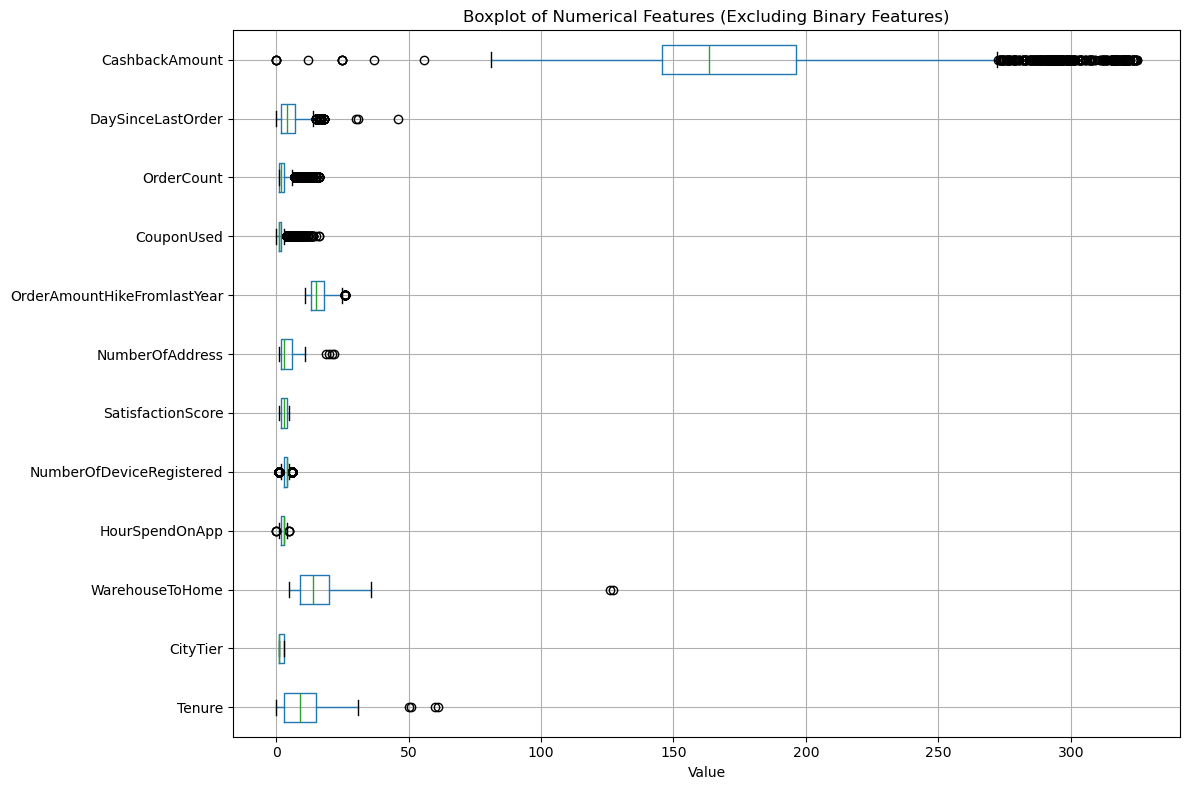

In [28]:
# Select numerical columns
num_columns = df.select_dtypes(include=['number']).columns

# Exclude binary columns (those with only 2 unique values)
non_binary_cols = [col for col in num_columns if df[col].nunique() > 2]

# Plot boxplots for non-binary numerical columns
plt.figure(figsize=(12, 8))  
df[non_binary_cols].boxplot(vert=False) 

plt.title("Boxplot of Numerical Features (Excluding Binary Features)")
plt.xlabel("Value")
plt.tight_layout()
plt.show()

# Handle outlier

In [30]:
df['CashbackAmount'] = np.log(df['CashbackAmount'] + 1)

In [31]:
df['WarehouseToHome'] = np.log(df['WarehouseToHome'] + 1)


In [32]:
df.nunique()

Churn                             2
Tenure                           37
PreferredLoginDevice              2
CityTier                          3
WarehouseToHome                  35
PreferredPaymentMode              5
Gender                            2
HourSpendOnApp                    7
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      17
CouponUsed                       18
OrderCount                       17
DaySinceLastOrder                23
CashbackAmount                 2586
dtype: int64

# Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

data2 = df.copy()

categorical_columns = ['PreferredLoginDevice','PreferredPaymentMode',
                       'Gender','PreferedOrderCat','MaritalStatus', ]

label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data2[col] = le.fit_transform(data2[col])
    label_encoders[col] = le 

# Step 3: Split features and target
X = data2.drop(columns=['Churn'])
y = data2['Churn']

data2.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,1,3,1.945910,2,0,3.000000,3,2,2,2,9,1,11.0,1.0,1.0,5.0,5.080969
1,1,10.189899,1,1,2.197225,4,1,3.000000,4,3,3,2,7,1,15.0,0.0,1.0,0.0,4.803201
2,1,10.189899,1,1,3.433987,2,1,2.000000,4,3,3,2,6,1,14.0,0.0,1.0,3.0,4.798102
3,1,0.000000,1,3,2.772589,2,1,2.000000,4,2,5,2,8,0,23.0,0.0,1.0,3.0,4.905793
4,1,0.000000,1,1,2.564949,1,1,2.931535,3,3,5,2,3,0,11.0,1.0,1.0,3.0,4.872139


# Show Class Imbalance

✅ Class Distribution:
Churn
0    4682
1     948
Name: count, dtype: int64

✅ Class Imbalance Percentage:
Churn
0    83.161634
1    16.838366
Name: count, dtype: float64


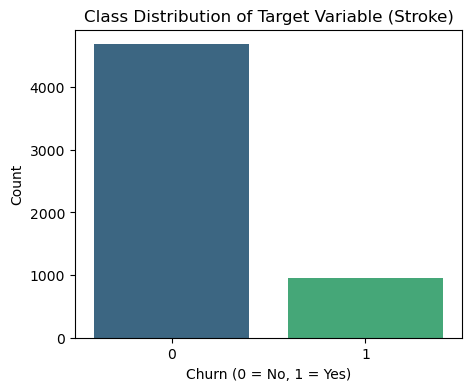

In [36]:
class_counts = data2["Churn"].value_counts()
class_ratio = class_counts / len(data2) * 100

print("✅ Class Distribution:")
print(class_counts)
print("\n✅ Class Imbalance Percentage:")
print(class_ratio)

plt.figure(figsize=(5, 4))
sns.countplot(x="Churn", data=data2, palette="viridis")
plt.title("Class Distribution of Target Variable (Stroke)")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Apply Smote to Balance class

In [38]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Visualize class Balance

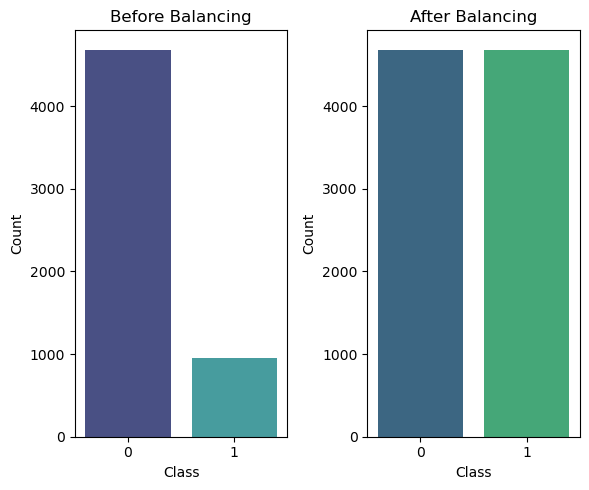

In [40]:
# Count original class distribution
original_counts = y.value_counts()

# Count new class distribution
balanced_counts = y_smote.value_counts()

# Plotting the distributions side by side
fig, axes = plt.subplots(1, 2, figsize=(6, 5))

# Original data plot
sns.barplot(
    x=original_counts.index,
    y=original_counts.values,
    palette="mako",
    ax=axes[0]
)
axes[0].set_title("Before Balancing")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Class")

# Balanced data plot
sns.barplot(
    x=balanced_counts.index,
    y=balanced_counts.values,
    palette="viridis",
    ax=axes[1]
)
axes[1].set_title("After Balancing")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Class")

plt.tight_layout()
plt.show()

# Scalling Data

In [42]:
numerical_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                  'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
                  'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

scaler = StandardScaler()
X_smote[numerical_cols] = scaler.fit_transform(X_smote[numerical_cols])

data3 = X_smote.copy()
data3['Churn'] = y_smote

data3.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,-0.467186,1,3,-1.751269,2,0,0.085615,-0.687000,2,-0.827402,2,1.838033,1,-1.278081,-0.404559,-0.685592,0.286931,-0.116579,1
1,0.307393,1,1,-1.193112,4,1,0.085615,0.331858,3,-0.089236,2,1.071466,1,-0.175282,-0.956432,-0.685592,-1.185889,-1.179056,1
2,0.307393,1,1,1.553678,2,1,-1.426851,0.331858,3,-0.089236,2,0.688183,1,-0.450981,-0.956432,-0.685592,-0.302197,-1.198560,1
3,-0.967730,1,3,0.084744,2,1,-1.426851,0.331858,2,1.387096,2,1.454750,0,2.030316,-0.956432,-0.685592,-0.302197,-0.786636,1
4,-0.967730,1,1,-0.376413,1,1,-0.017936,-0.687000,3,1.387096,2,-0.461667,0,-1.278081,-0.404559,-0.685592,-0.302197,-0.915364,1


# Exploratory Data Analysis

In [44]:
outcome = ['Churn']

num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
            'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
            'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
            'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

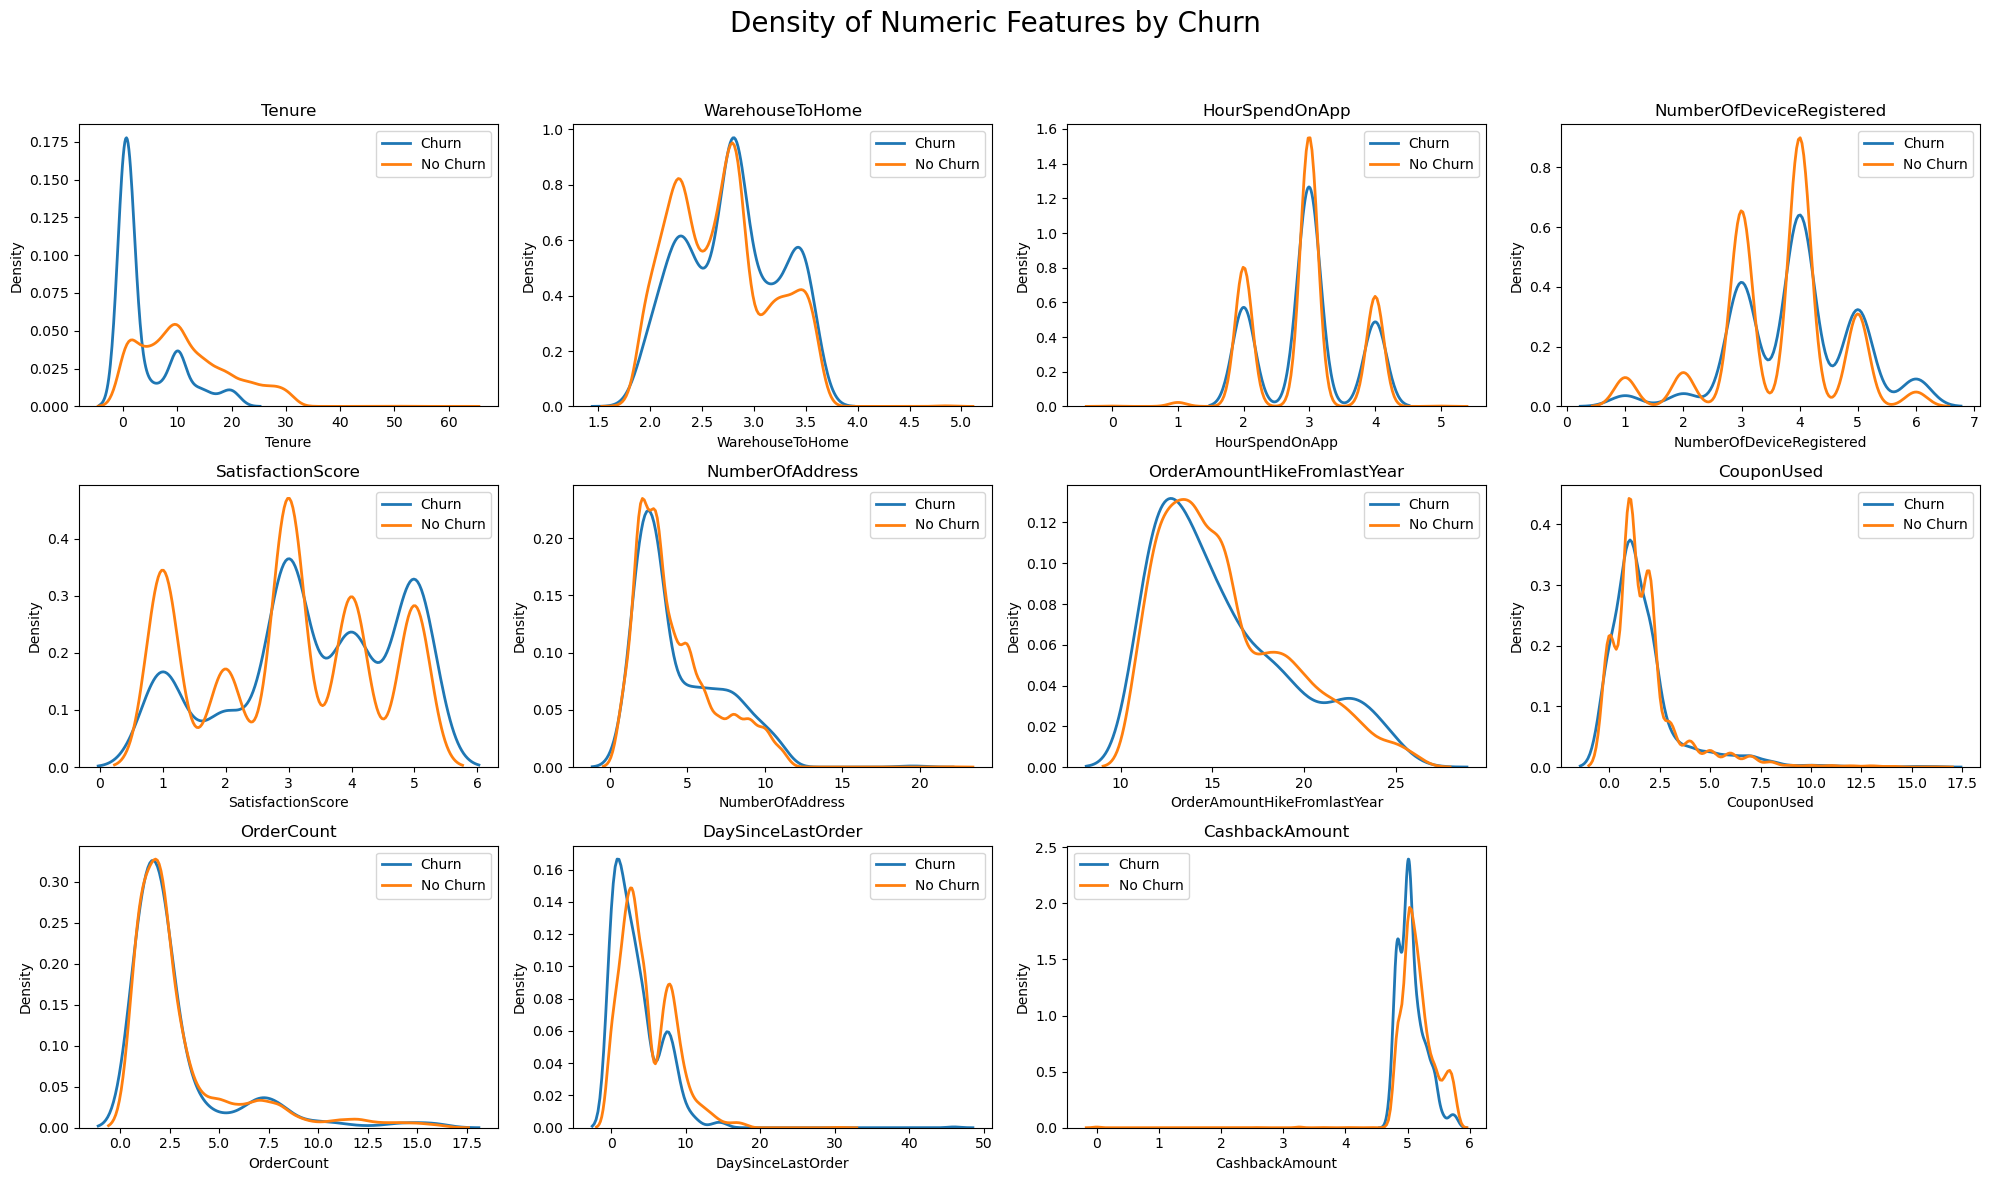

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

df_c = df[df['Churn'] == 1]
df_nc = df[df['Churn'] == 0]

n_cols = 4  # Number of plots per row
n_plots = len(num_cols)
n_rows = math.ceil(n_plots / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
plt.suptitle('Density of Numeric Features by Churn', fontsize=20)

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(df_c[col], label='Churn', linewidth=2)
    sns.kdeplot(df_nc[col], label='No Churn', linewidth=2)
    plt.title(col)
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

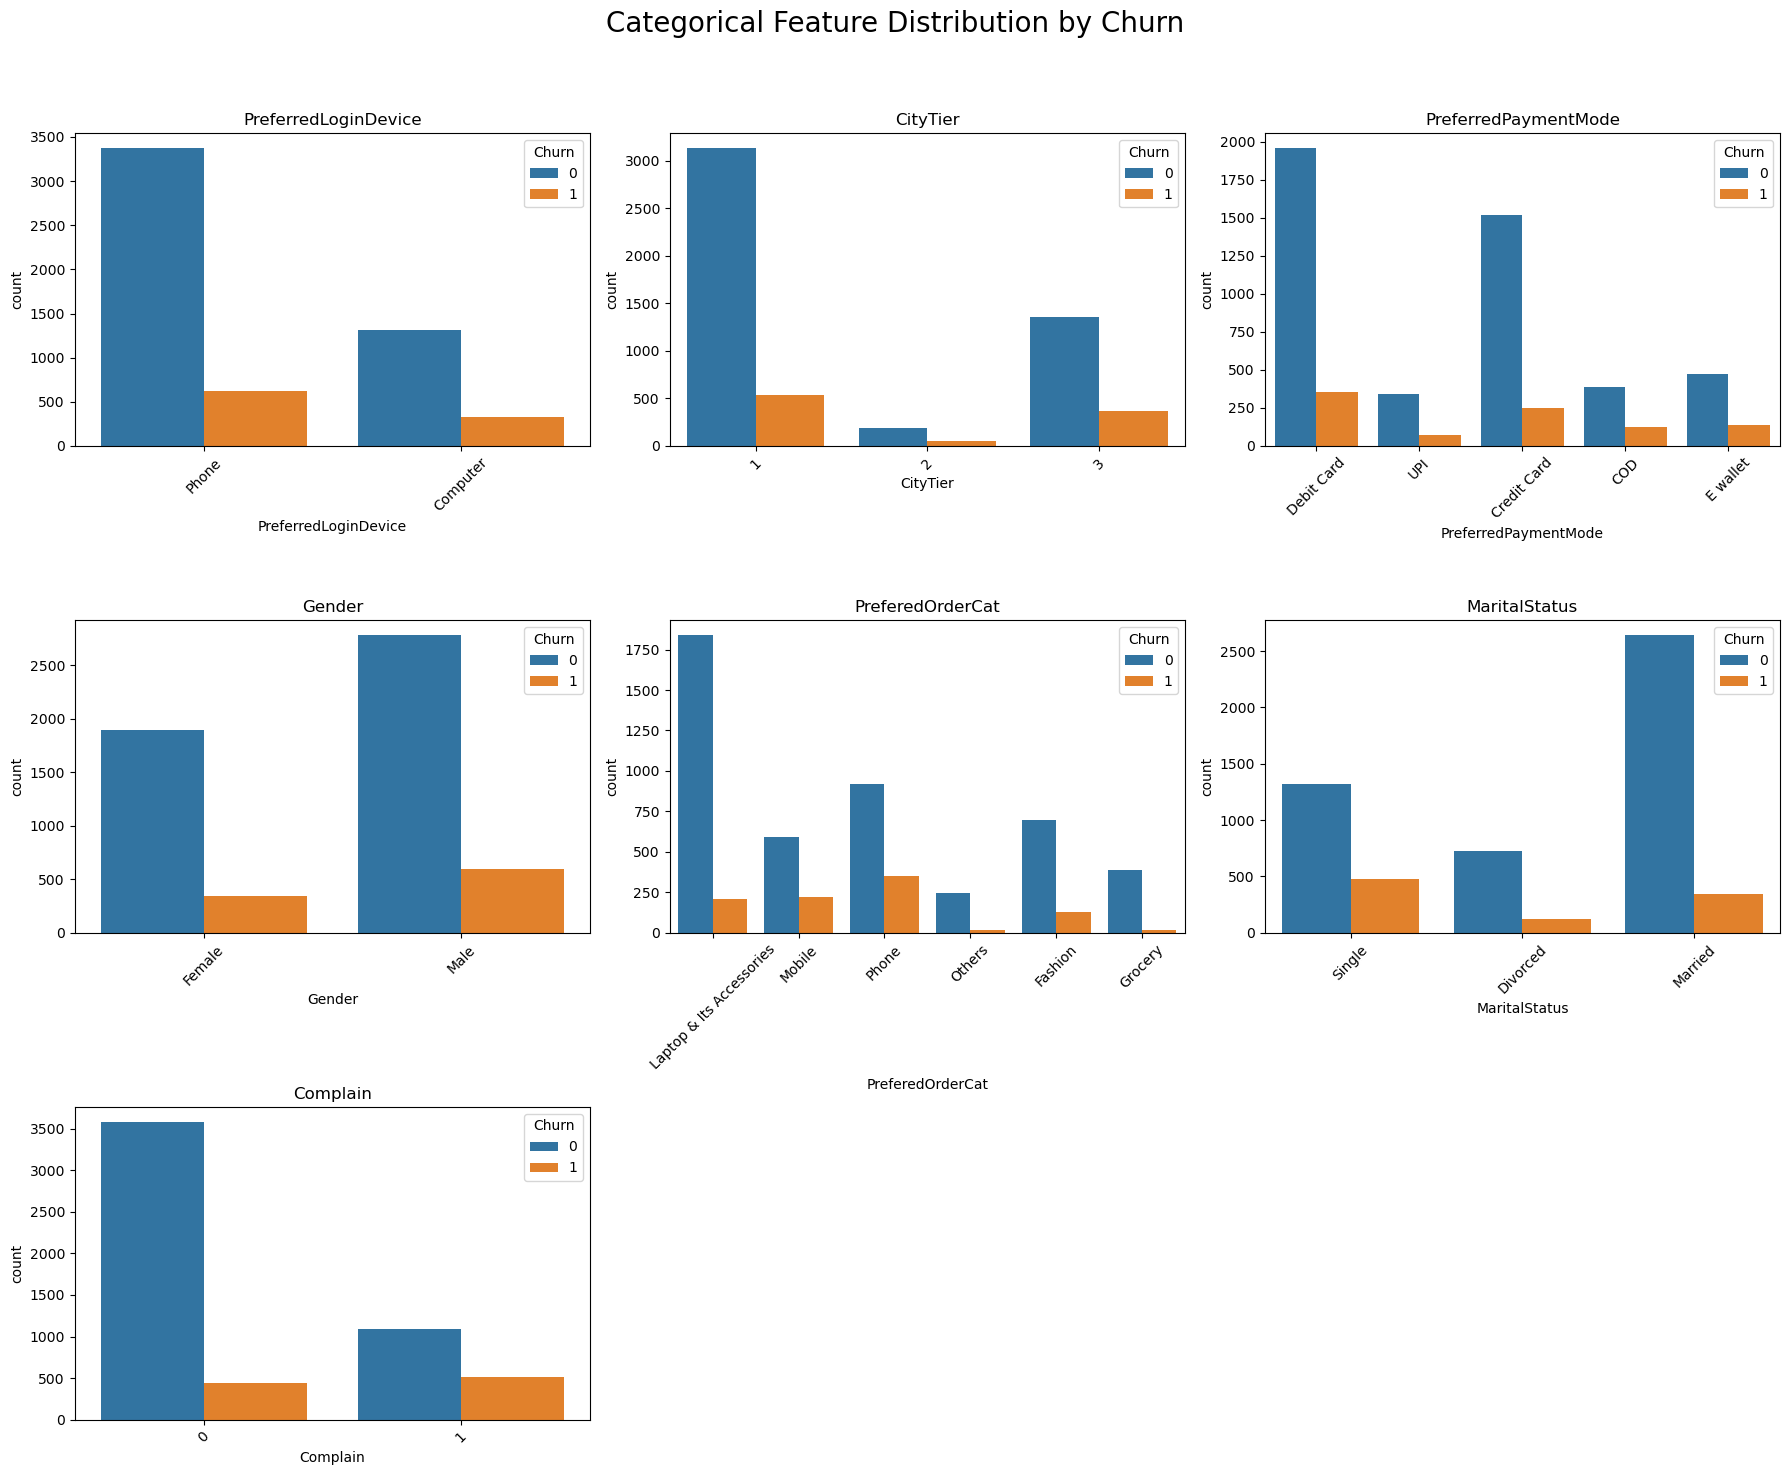

In [46]:
# Adjust number of columns per row
n_cols = 3
n_plots = len(cat_cols)
n_rows = math.ceil(n_plots / n_cols)

plt.figure(figsize=(6 * n_cols, 5 * n_rows))
plt.suptitle('Categorical Feature Distribution by Churn', fontsize=20)

for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.legend(title='Churn')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Relationship between features

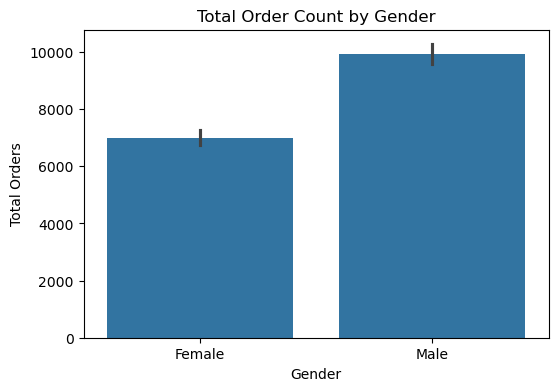

In [48]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Gender', y='OrderCount', estimator='sum')
plt.title('Total Order Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Orders')
plt.show()

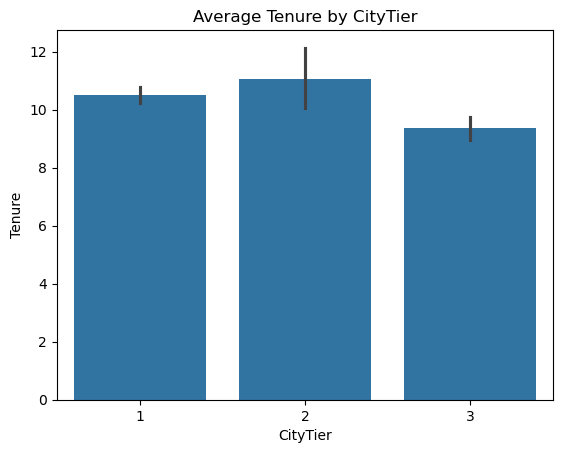

In [49]:
sns.barplot(data=df, x='CityTier', y='Tenure')
plt.title('Average Tenure by CityTier')
plt.show()


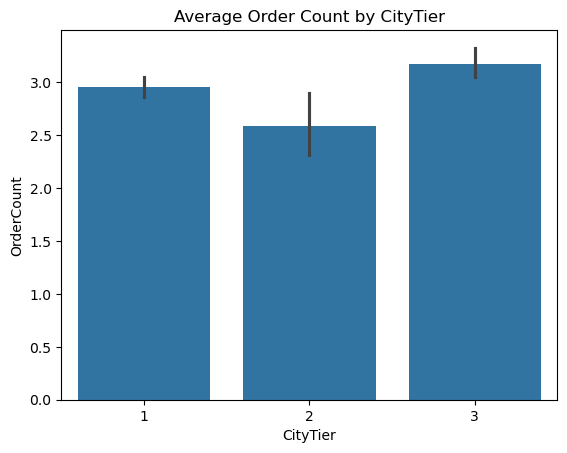

In [50]:
sns.barplot(data=df, x='CityTier', y='OrderCount')
plt.title('Average Order Count by CityTier')
plt.show()


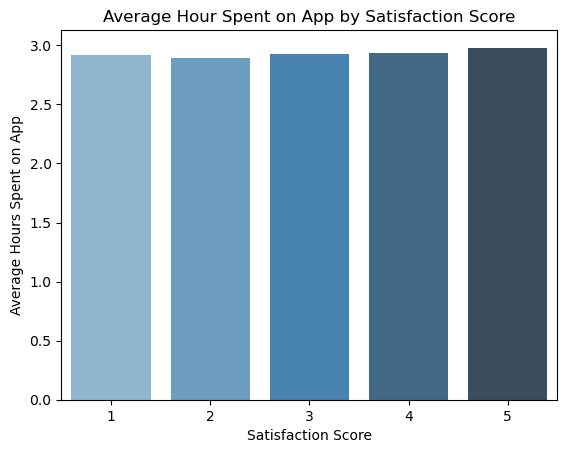

In [51]:
# Group by SatisfactionScore and calculate average HourSpendOnApp
avg_hours = df.groupby('SatisfactionScore')['HourSpendOnApp'].mean().reset_index()

# Bar plot
sns.barplot(data=avg_hours, x='SatisfactionScore', y='HourSpendOnApp', palette='Blues_d')
plt.title('Average Hour Spent on App by Satisfaction Score')
plt.ylabel('Average Hours Spent on App')
plt.xlabel('Satisfaction Score')
plt.show()


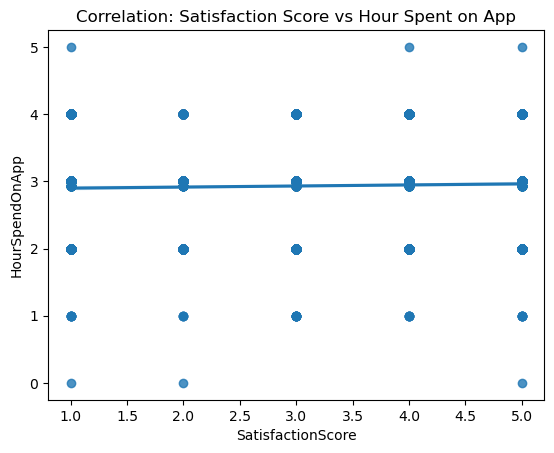

In [52]:
sns.regplot(data=df, x='SatisfactionScore', y='HourSpendOnApp')
plt.title('Correlation: Satisfaction Score vs Hour Spent on App')
plt.show()


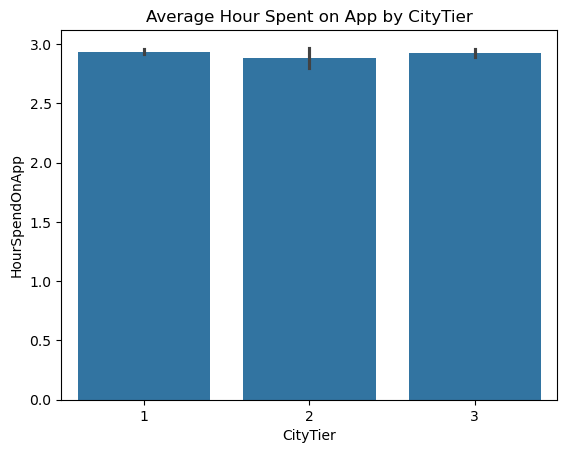

In [53]:
sns.barplot(data=df, x='CityTier', y='HourSpendOnApp')
plt.title('Average Hour Spent on App by CityTier')
plt.show()


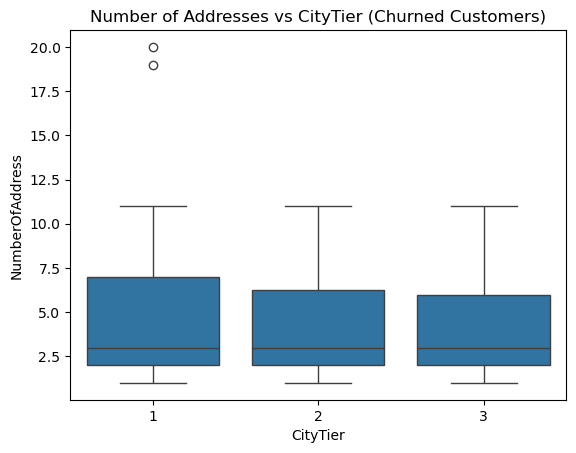

In [54]:
sns.boxplot(data=df[df['Churn']==1], x='CityTier', y='NumberOfAddress')
plt.title('Number of Addresses vs CityTier (Churned Customers)')
plt.show()


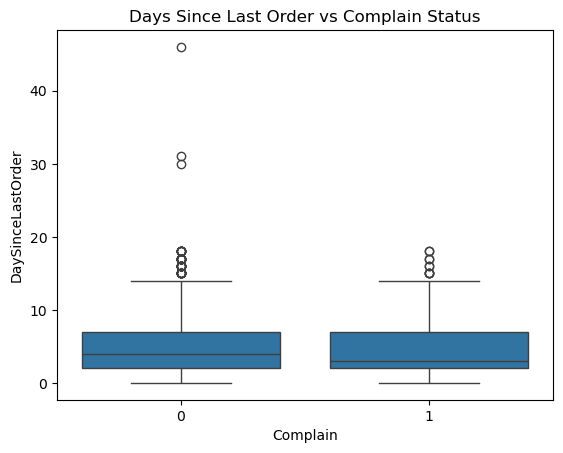

In [55]:
sns.boxplot(data=df, x='Complain', y='DaySinceLastOrder')
plt.title('Days Since Last Order vs Complain Status')
plt.show()


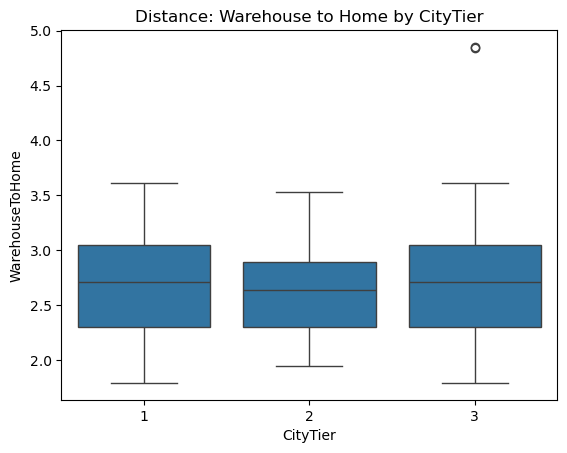

In [56]:
sns.boxplot(data=df, x='CityTier', y='WarehouseToHome')
plt.title('Distance: Warehouse to Home by CityTier')
plt.show()


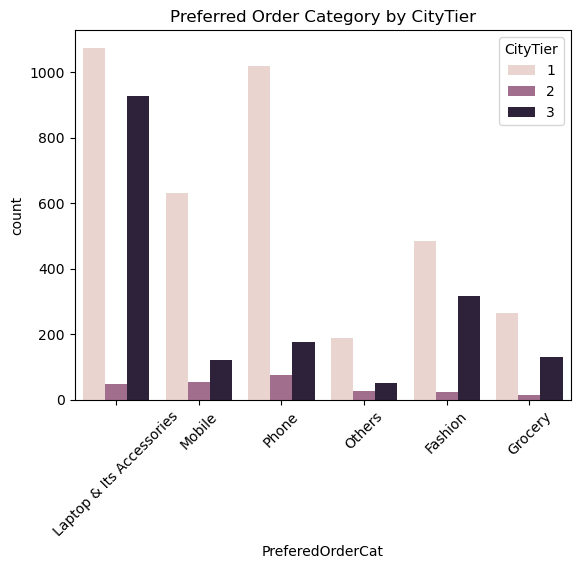

In [57]:
sns.countplot(data=df, x='PreferedOrderCat', hue='CityTier')
plt.title('Preferred Order Category by CityTier')
plt.xticks(rotation=45)
plt.show()


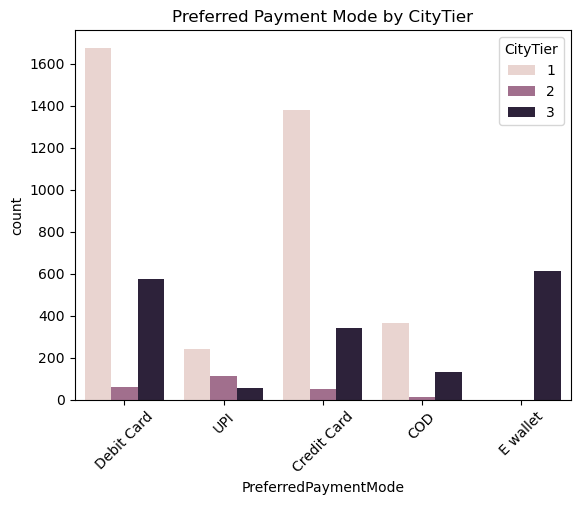

In [58]:
sns.countplot(data=df, x='PreferredPaymentMode', hue='CityTier')
plt.title('Preferred Payment Mode by CityTier')
plt.xticks(rotation=45)
plt.show()


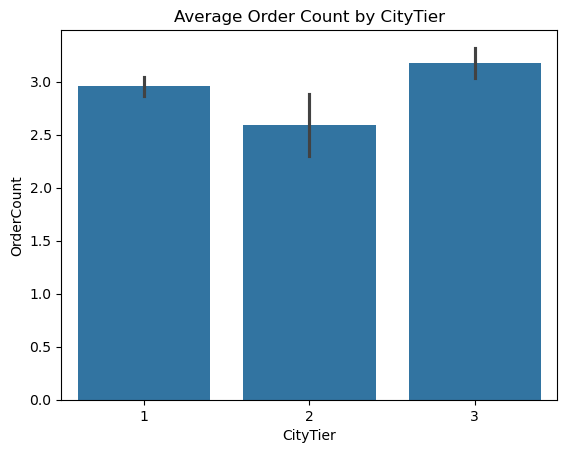

In [59]:
sns.barplot(data=df, x='CityTier', y='OrderCount')
plt.title('Average Order Count by CityTier')
plt.show()


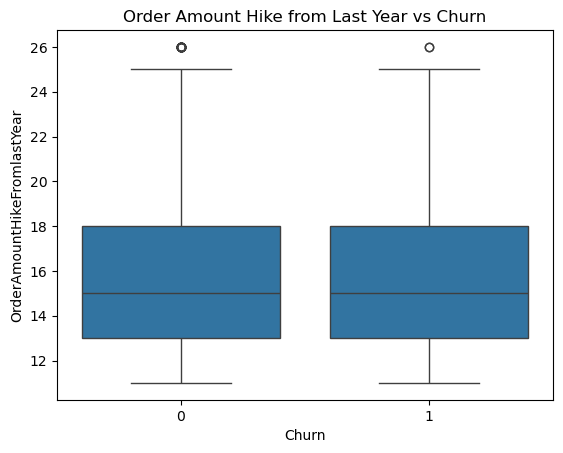

In [60]:
sns.boxplot(data=df, x='Churn', y='OrderAmountHikeFromlastYear')
plt.title('Order Amount Hike from Last Year vs Churn')
plt.show()


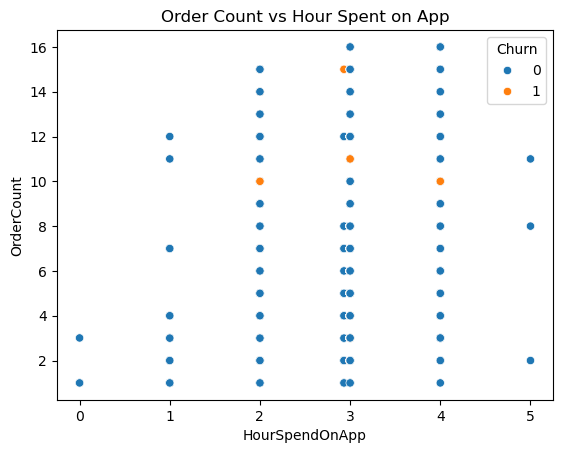

In [61]:
sns.scatterplot(data=df, x='HourSpendOnApp', y='OrderCount', hue='Churn')
plt.title('Order Count vs Hour Spent on App')
plt.show()


# Correlation Matrix

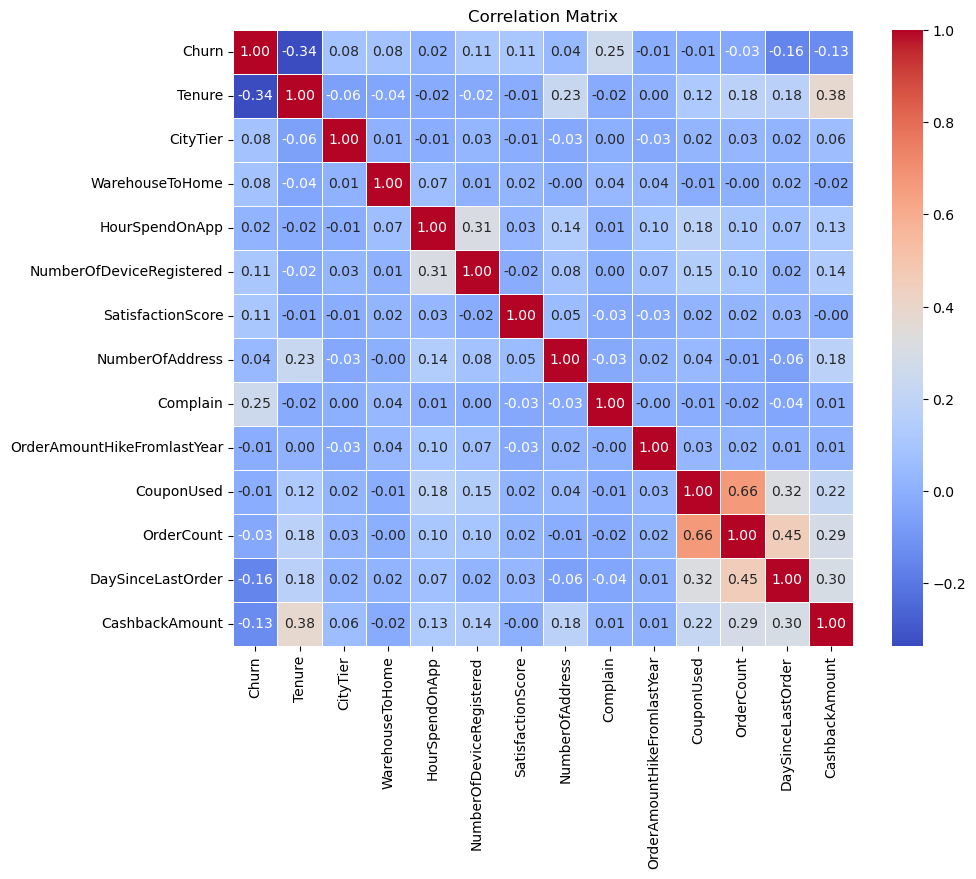

In [63]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Split the Dataset

In [65]:
X_final = data3.drop('Churn', axis=1)
y_final = data3['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

# LogisticRegression

Logistic Regression


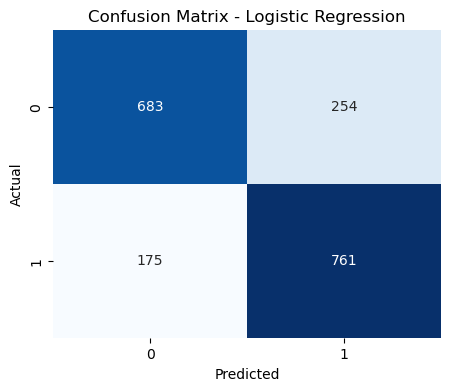


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76       937
           1       0.75      0.81      0.78       936

    accuracy                           0.77      1873
   macro avg       0.77      0.77      0.77      1873
weighted avg       0.77      0.77      0.77      1873

Accuracy: 0.7710


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

print("Logistic Regression")
plot_confusion_matrix(y_test, y_pred_lr, "Confusion Matrix - Logistic Regression")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")


# Random Forest

Random Forest


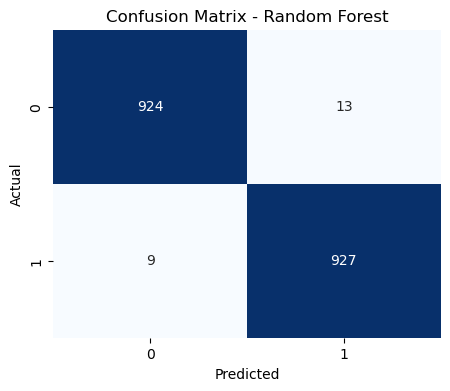


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       937
           1       0.99      0.99      0.99       936

    accuracy                           0.99      1873
   macro avg       0.99      0.99      0.99      1873
weighted avg       0.99      0.99      0.99      1873

Accuracy: 0.9883


In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


print("Random Forest")
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix - Random Forest")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


# Support Vector Machine

Support Vector Machine


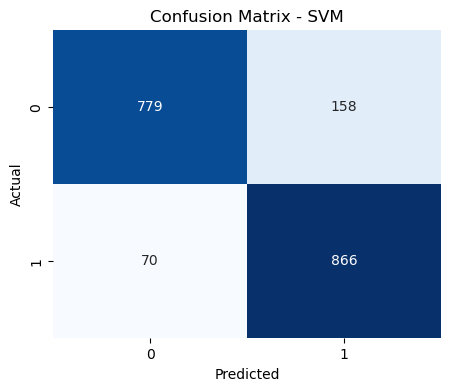


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       937
           1       0.85      0.93      0.88       936

    accuracy                           0.88      1873
   macro avg       0.88      0.88      0.88      1873
weighted avg       0.88      0.88      0.88      1873

Accuracy: 0.8783


In [71]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


print("Support Vector Machine")
plot_confusion_matrix(y_test, y_pred_svm, "Confusion Matrix - SVM")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")


# XGBoost Classifier

XGBoost Classifier


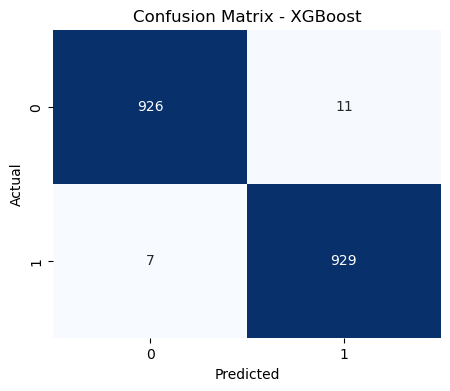


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       937
           1       0.99      0.99      0.99       936

    accuracy                           0.99      1873
   macro avg       0.99      0.99      0.99      1873
weighted avg       0.99      0.99      0.99      1873

Accuracy: 0.9904


In [73]:
from xgboost import XGBClassifier

xgb =XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


print("XGBoost Classifier")
plot_confusion_matrix(y_test, y_pred_xgb, "Confusion Matrix - XGBoost")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


# KNN

KNN 


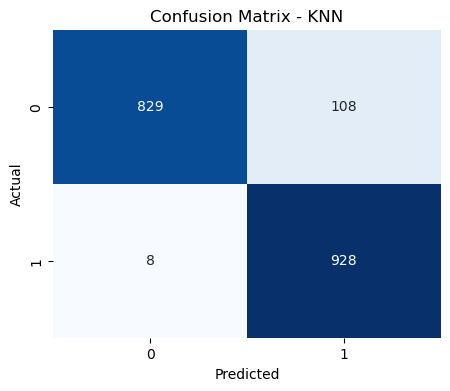


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       937
           1       0.90      0.99      0.94       936

    accuracy                           0.94      1873
   macro avg       0.94      0.94      0.94      1873
weighted avg       0.94      0.94      0.94      1873

Accuracy: 0.9381


In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
    
print("KNN ")
plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix - KNN")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")


# Decision Tree

Decision Tree


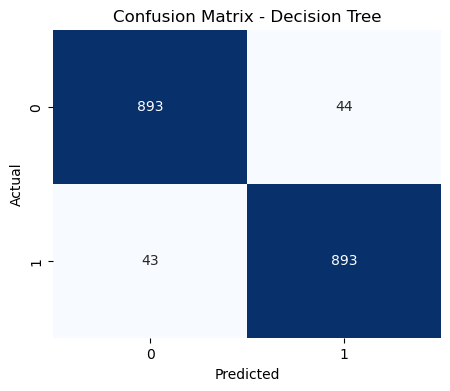


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       937
           1       0.95      0.95      0.95       936

    accuracy                           0.95      1873
   macro avg       0.95      0.95      0.95      1873
weighted avg       0.95      0.95      0.95      1873

Accuracy: 0.9536


In [77]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

print("Decision Tree")
plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix - Decision Tree")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")


# Naive Bayes

Naive Bayes 


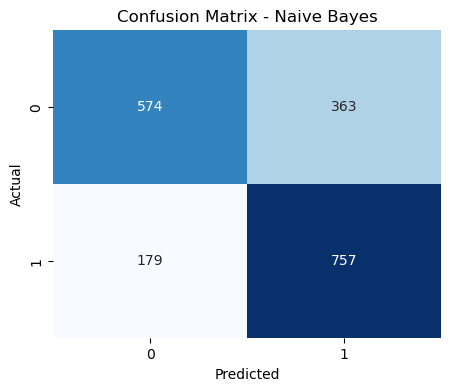


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.61      0.68       937
           1       0.68      0.81      0.74       936

    accuracy                           0.71      1873
   macro avg       0.72      0.71      0.71      1873
weighted avg       0.72      0.71      0.71      1873

Accuracy: 0.7106


In [79]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

print("Naive Bayes ")
plot_confusion_matrix(y_test, y_pred_nb, "Confusion Matrix - Naive Bayes")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")


# Store All Model Results

In [81]:
model_scores = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_lr),
        "Precision": precision_score(y_test, y_pred_lr, average="weighted"),
        "Recall": recall_score(y_test, y_pred_lr, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred_lr, average="weighted"),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf, average="weighted"),
        "Recall": recall_score(y_test, y_pred_rf, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred_rf, average="weighted"),
    },
    "SVM": {
        "Accuracy": accuracy_score(y_test, y_pred_svm),
        "Precision": precision_score(y_test, y_pred_svm, average="weighted"),
        "Recall": recall_score(y_test, y_pred_svm, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred_svm, average="weighted"),
    },
    "KNN": {
        "Accuracy": accuracy_score(y_test, y_pred_knn),
        "Precision": precision_score(y_test, y_pred_knn, average="weighted"),
        "Recall": recall_score(y_test, y_pred_knn, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred_knn, average="weighted"),
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Precision": precision_score(y_test, y_pred_dt, average="weighted"),
        "Recall": recall_score(y_test, y_pred_dt, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred_dt, average="weighted"),
    },
    "Naive Bayes": {
        "Accuracy": accuracy_score(y_test, y_pred_nb),
        "Precision": precision_score(y_test, y_pred_nb, average="weighted"),
        "Recall": recall_score(y_test, y_pred_nb, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred_nb, average="weighted"),
    },
    "XGBClassifier": {
        "Accuracy": accuracy_score(y_test, y_pred_xgb),
        "Precision": precision_score(y_test, y_pred_xgb, average="weighted"),
        "Recall": recall_score(y_test, y_pred_xgb, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred_xgb, average="weighted"),
    }
}

# Compare Performance Using Bar Plot

                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.770956   0.772908  0.770956  0.770553
Random Forest        0.988254   0.988263  0.988254  0.988254
SVM                  0.878270   0.881646  0.878270  0.878004
KNN                  0.938067   0.943123  0.938067  0.937892
Decision Tree        0.953550   0.953551  0.953550  0.953550
Naive Bayes          0.710625   0.719112  0.710625  0.707820
XGBClassifier        0.990390   0.990399  0.990390  0.990390


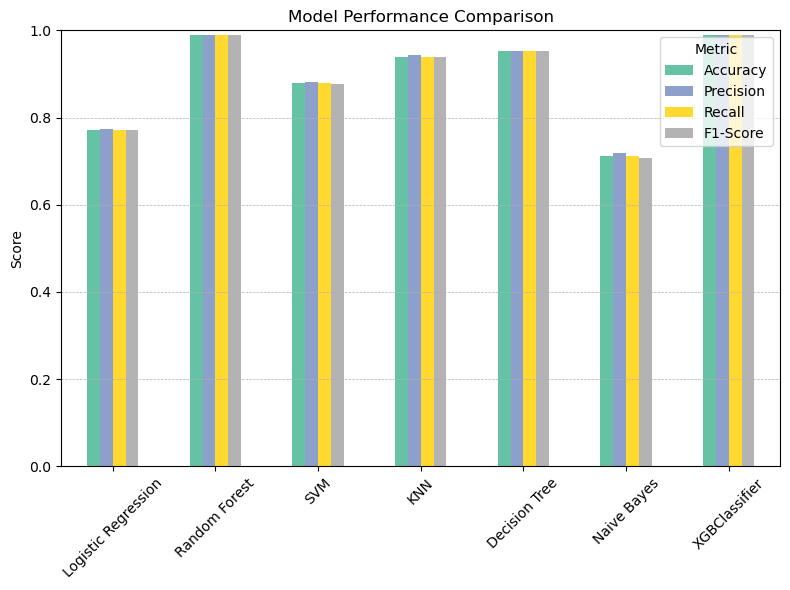

In [83]:
results_df = pd.DataFrame(model_scores).T  
print(results_df)
results_df.plot(kind='bar', figsize=(8, 6), colormap='Set2')

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Pick The Best Model

In [85]:
trained_models = {
    "LogisticRegression" : lr,
    "RandomForest": rf,        
    "XGBClassifier" : xgb,
    "SVM": svm              ,    
    "KNN" : knn,
    "Decision Tre" : dt,
    "Naive Bayes" : nb
}

scores_df = pd.DataFrame(model_scores).T

best_model_name = scores_df["F1-Score"].idxmax()
best_f1_score = scores_df["F1-Score"].max()

print(f"\n✅ Best Model Selected: {best_model_name} with F1-Score = {best_f1_score:.4f}")

best_model = trained_models[best_model_name]


✅ Best Model Selected: XGBClassifier with F1-Score = 0.9904


# ROC curve

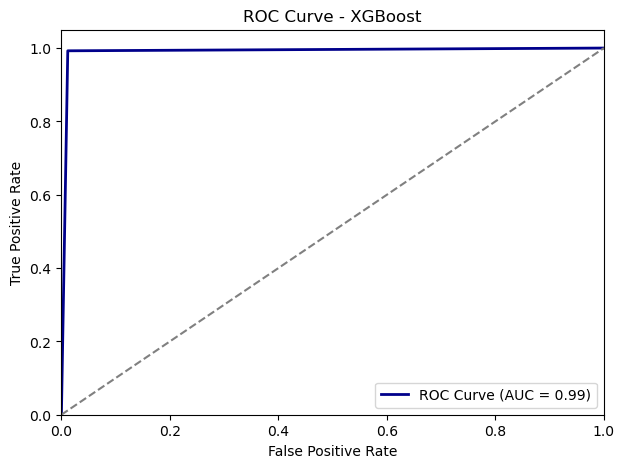

In [87]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(7, 5))
plt.plot(fpr_xgb, tpr_xgb, color='darkblue', lw=2, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

# Save the model

In [89]:
best_model = trained_models[best_model_name]
joblib.dump(best_model, "best_model.pkl")

print("✅ Best model saved as best_model.pkl")

✅ Best model saved as best_model.pkl


In [90]:
joblib.dump(X_train.columns.tolist(), 'model_features.pkl')


['model_features.pkl']

In [91]:
joblib.dump(label_encoders, "encoders.pkl")

['encoders.pkl']

In [92]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

# SHAP-Visualization

In [94]:
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(X_test)

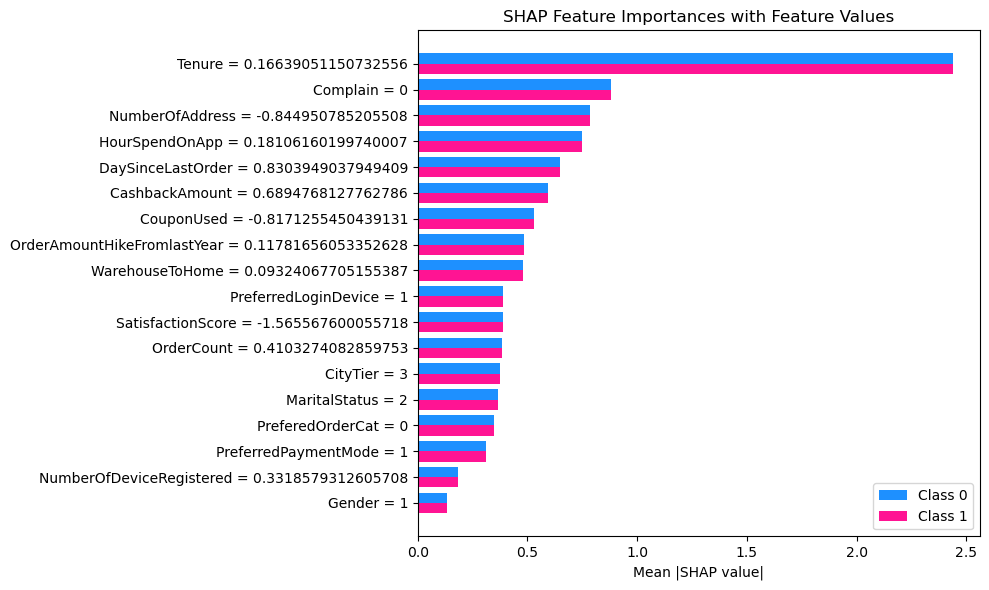

In [95]:
feature_names = [ "Tenure"  ,"PreferredLoginDevice"  ,"CityTier" ,                         
                 "WarehouseToHome"   ,"PreferredPaymentMode" ,"Gender"  ,"HourSpendOnApp" ,                  
                 "NumberOfDeviceRegistered" ,"PreferedOrderCat"   ,"SatisfactionScore"  ,              
                 "MaritalStatus" ,"NumberOfAddress"  ,"Complain"  ,"OrderAmountHikeFromlastYear" ,     
                 "CouponUsed"  ,"OrderCount"  ,"DaySinceLastOrder"  ,"CashbackAmount"  ]

X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Get mean(|SHAP|) per feature per class
mean_abs_shap_class0 = np.abs(shap_values).mean(axis=0)
mean_abs_shap_class1 = np.abs(shap_values).mean(axis=0)

# Choose top N features based on class 1 importance
topn = 25
top_indices = np.argsort(mean_abs_shap_class1)[::-1][:topn]

feature_labels = [
    f"{feature_names[i]} = {X_test_df.iloc[0, i]}" for i in top_indices
]

# Bar plot
index = np.arange(len(top_indices))
bar_width = 0.4

plt.figure(figsize=(10, 6))
plt.barh(index, [mean_abs_shap_class0[i] for i in top_indices], bar_width, color='dodgerblue', label='Class 0')
plt.barh(index + bar_width, [mean_abs_shap_class1[i] for i in top_indices], bar_width, color='deeppink', label='Class 1')

plt.yticks(index + bar_width / 2, feature_labels)
plt.xlabel("Mean |SHAP value|")
plt.title("SHAP Feature Importances with Feature Values")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Force-plot

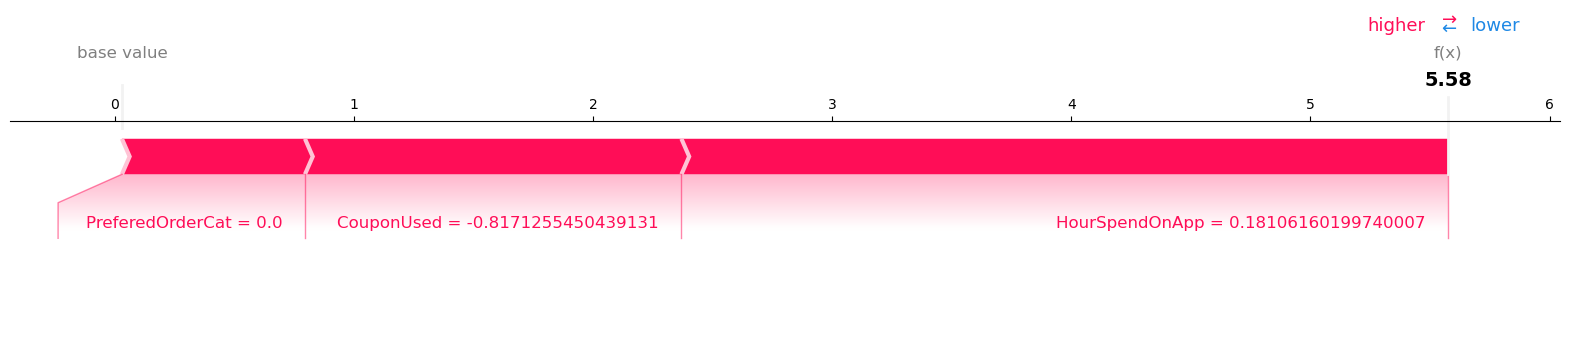

In [97]:
i = 0

# Get SHAP values and absolute values for that instance
instance_shap_values = shap_values[i]
abs_shap = np.abs(instance_shap_values)

top_indices = abs_shap.argsort()[-3:]

# Filter values and features
filtered_shap = instance_shap_values[top_indices]
filtered_features = X_test.iloc[i, top_indices]
filtered_feature_names = X_test.columns[top_indices]

# Plot force plot with only top 3 features
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=filtered_shap,
    features=filtered_features,
    feature_names=filtered_feature_names,
    matplotlib=True
)

# Summary Plot

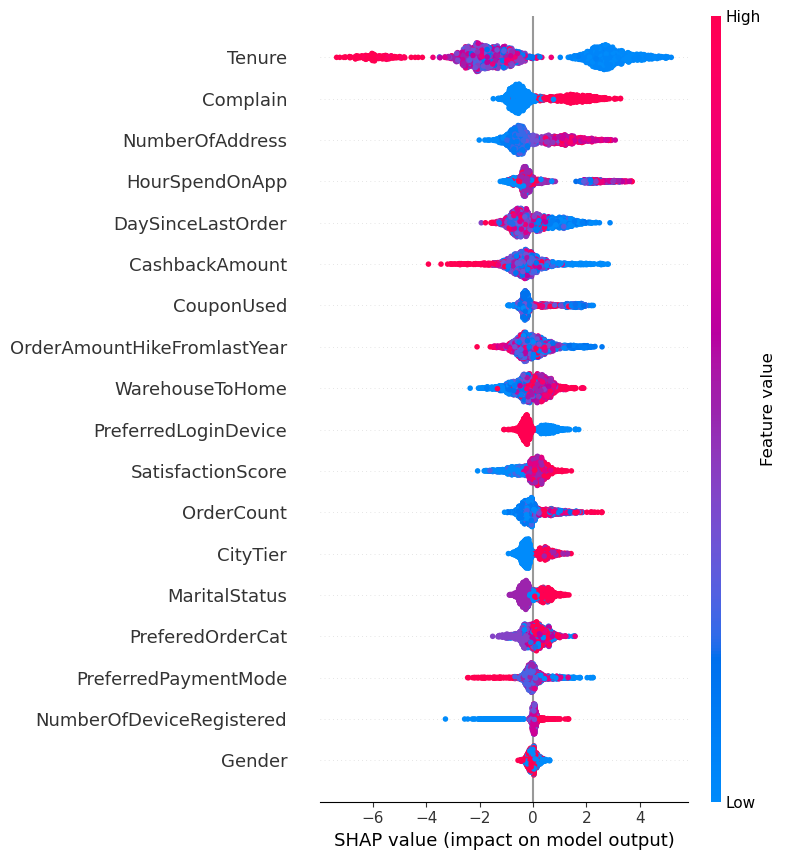

In [99]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


# decision_plot

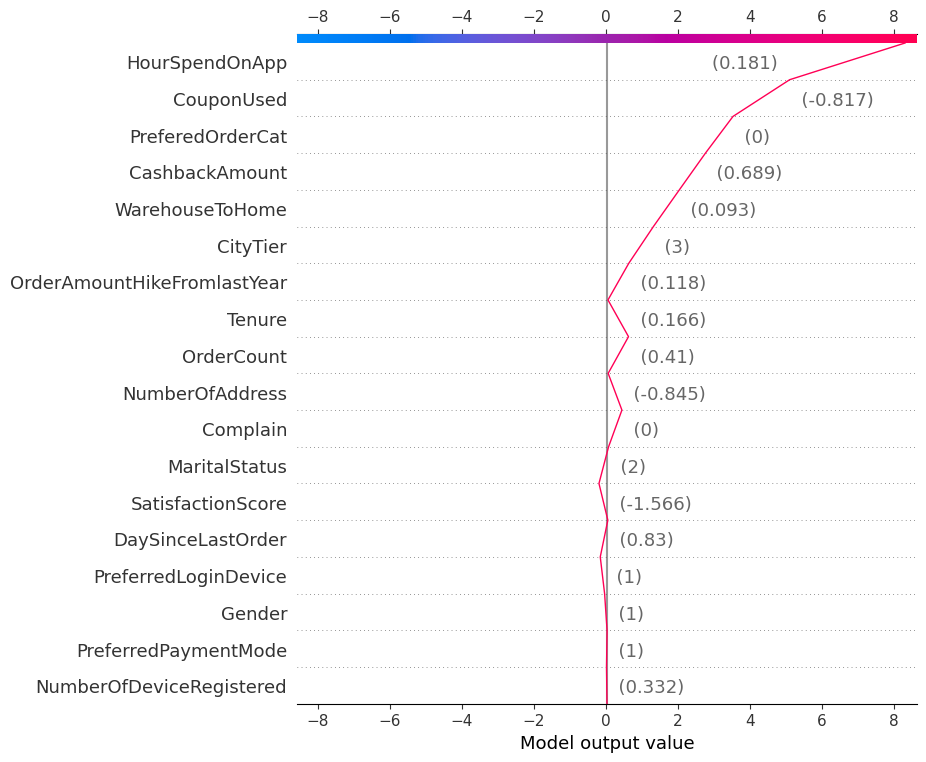

In [101]:
i = 0 

shap.decision_plot(
    base_value=explainer.expected_value,      
    shap_values=shap_values[i],               
    features=X_test.iloc[i],                  
    feature_names=list(X_test.columns)        
)